# Create eQTL marker maps for data transformed with RINT

__Author:__ Bryan Quach  
__Date:__ June 2, 2017

### Estimated Analysis Time: <1 days

## Objective

To get a better sense of the spatial distribution of eQTLs in relation to their quantitatve trait regions (QTRs), we create a map of color-encoded q-values on a scatterplot of eQTL genomic location vs. QTG genomic location.

## The Data

The data we start with are p-values in a matrix of gene x marker-associated segments. We also have genomic coordinate information for each marker. To simplify the annotation to location mapping for both genes and marker segments, we will use the TSS and starting position respectively as the representative genomic coordinate. We have results from both trans- and cis-eQTL analyses. We applied [FDR correction](https://en.wikipedia.org/wiki/False_discovery_rate) to the p-values from all association tests. The resulting q-values were filtered to only those with FDR <= 0.1. This filtered set of associations are used for downstream visualization of eQTL locations.

## Creating cis + trans-eQTL location maps

In [3]:
# Get FDR corrected eqtls for each tissue
lung.eqtl <- readRDS("data/eqtl_fdr_0.1_control_lung_rint_trans.rds")
liver.eqtl <- readRDS("data/eqtl_fdr_0.1_control_liver_rint_trans.rds")
kidney.eqtl <- readRDS("data/eqtl_fdr_0.1_control_kidney_rint_trans.rds")

# Load other data
marker.map <- read.delim("data/marker_locations.txt", header=T, stringsAsFactors=F)
rownames(marker.map) <- marker.map$marker
tss.map <- read.delim("data/refseq_mm9_tss.txt", header=F, stringsAsFactors=F)
chr.sizes <- read.delim("data/mm9_chrom_sizes.txt", header=F, stringsAsFactors=F)
colnames(tss.map) <- c("chr","start","end","gene","id")
rownames(tss.map) <- tss.map$gene
colnames(chr.sizes) <- c("chr","length")

# Convert chromosome lengths and genomic locations to Mb
chr.sizes$length <- chr.sizes$length/1000000
marker.map$position <- marker.map$position/1000000
tss.map$start <- tss.map$start/1000000
tss.map$end <- tss.map$end/1000000

In [4]:
# Make eQTL lists
lung.eqtl10 <- lung.eqtl[which(lung.eqtl$qval<0.1 & lung.eqtl$qval>0.05),]
lung.eqtl5 <- lung.eqtl[which(lung.eqtl$qval<=0.05 & lung.eqtl$qval>0.01),]
lung.eqtl1 <- lung.eqtl[which(lung.eqtl$qval<=0.01),]
liver.eqtl10 <- liver.eqtl[which(liver.eqtl$qval<0.1 & liver.eqtl$qval>0.05),]
liver.eqtl5 <- liver.eqtl[which(liver.eqtl$qval<=0.05 & liver.eqtl$qval>0.01),]
liver.eqtl1 <- liver.eqtl[which(liver.eqtl$qval<=0.01),]
kidney.eqtl10 <- kidney.eqtl[which(kidney.eqtl$qval<0.1 & kidney.eqtl$qval>0.05),]
kidney.eqtl5 <- kidney.eqtl[which(kidney.eqtl$qval<=0.05 & kidney.eqtl$qval>0.01),]
kidney.eqtl1 <- kidney.eqtl[which(kidney.eqtl$qval<=0.01),]

# Get reference marker name
lung.marker10 <- as.character(sapply(strsplit(as.character(lung.eqtl10$marker), split=".", fixed=T), function(x){x[1]}))
lung.marker5 <- as.character(sapply(strsplit(as.character(lung.eqtl5$marker), split=".", fixed=T), function(x){x[1]}))
lung.marker1 <- as.character(sapply(strsplit(as.character(lung.eqtl1$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker10 <- as.character(sapply(strsplit(as.character(liver.eqtl10$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker5 <- as.character(sapply(strsplit(as.character(liver.eqtl5$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker1 <- as.character(sapply(strsplit(as.character(liver.eqtl1$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker10 <- as.character(sapply(strsplit(as.character(kidney.eqtl10$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker5 <- as.character(sapply(strsplit(as.character(kidney.eqtl5$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker1 <- as.character(sapply(strsplit(as.character(kidney.eqtl1$marker), split=".", fixed=T), function(x){x[1]}))

# Get reference marker name
lung.marker10 <- as.character(sapply(strsplit(as.character(lung.eqtl10$marker), split=".", fixed=T), function(x){x[1]}))
lung.marker5 <- as.character(sapply(strsplit(as.character(lung.eqtl5$marker), split=".", fixed=T), function(x){x[1]}))
lung.marker1 <- as.character(sapply(strsplit(as.character(lung.eqtl1$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker10 <- as.character(sapply(strsplit(as.character(liver.eqtl10$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker5 <- as.character(sapply(strsplit(as.character(liver.eqtl5$marker), split=".", fixed=T), function(x){x[1]}))
liver.marker1 <- as.character(sapply(strsplit(as.character(liver.eqtl1$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker10 <- as.character(sapply(strsplit(as.character(kidney.eqtl10$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker5 <- as.character(sapply(strsplit(as.character(kidney.eqtl5$marker), split=".", fixed=T), function(x){x[1]}))
kidney.marker1 <- as.character(sapply(strsplit(as.character(kidney.eqtl1$marker), split=".", fixed=T), function(x){x[1]}))

# Retrieve eQTL positions
lung.x10 <- c(as.numeric(marker.map[lung.marker10, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[lung.marker10, "chromosome"], chr.sizes$chr)])
lung.x5 <- c(as.numeric(marker.map[lung.marker5, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[lung.marker5, "chromosome"], chr.sizes$chr)])
lung.x1 <- c(as.numeric(marker.map[lung.marker1, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[lung.marker1, "chromosome"], chr.sizes$chr)])
liver.x10 <- c(as.numeric(marker.map[liver.marker10, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[liver.marker10, "chromosome"], chr.sizes$chr)])
liver.x5 <- c(as.numeric(marker.map[liver.marker5, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[liver.marker5, "chromosome"], chr.sizes$chr)])
liver.x1 <- c(as.numeric(marker.map[liver.marker1, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[liver.marker1, "chromosome"], chr.sizes$chr)])
kidney.x10 <- c(as.numeric(marker.map[kidney.marker10, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[kidney.marker10, "chromosome"], chr.sizes$chr)])
kidney.x5 <- c(as.numeric(marker.map[kidney.marker5, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[kidney.marker5, "chromosome"], chr.sizes$chr)])
kidney.x1 <- c(as.numeric(marker.map[kidney.marker1, "position"]) +
                  diffinv(chr.sizes$length)[match(marker.map[kidney.marker1, "chromosome"], chr.sizes$chr)])

# Retrieve gene positions
lung.y10 <- c(as.numeric(tss.map[as.character(lung.eqtl10$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(lung.eqtl10$gene), "chr"], chr.sizes$chr)])
lung.y5 <- c(as.numeric(tss.map[as.character(lung.eqtl5$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(lung.eqtl5$gene), "chr"], chr.sizes$chr)])
lung.y1 <- c(as.numeric(tss.map[as.character(lung.eqtl1$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(lung.eqtl1$gene), "chr"], chr.sizes$chr)])
liver.y10 <- c(as.numeric(tss.map[as.character(liver.eqtl10$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(liver.eqtl10$gene), "chr"], chr.sizes$chr)])
liver.y5 <- c(as.numeric(tss.map[as.character(liver.eqtl5$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(liver.eqtl5$gene), "chr"], chr.sizes$chr)])
liver.y1 <- c(as.numeric(tss.map[as.character(liver.eqtl1$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(liver.eqtl1$gene), "chr"], chr.sizes$chr)])
kidney.y10 <- c(as.numeric(tss.map[as.character(kidney.eqtl10$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(kidney.eqtl10$gene), "chr"], chr.sizes$chr)])
kidney.y5 <- c(as.numeric(tss.map[as.character(kidney.eqtl5$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(kidney.eqtl5$gene), "chr"], chr.sizes$chr)])
kidney.y1 <- c(as.numeric(tss.map[as.character(kidney.eqtl1$gene), "start"]) +
                   diffinv(chr.sizes$length)[match(tss.map[as.character(kidney.eqtl1$gene), "chr"], chr.sizes$chr)])

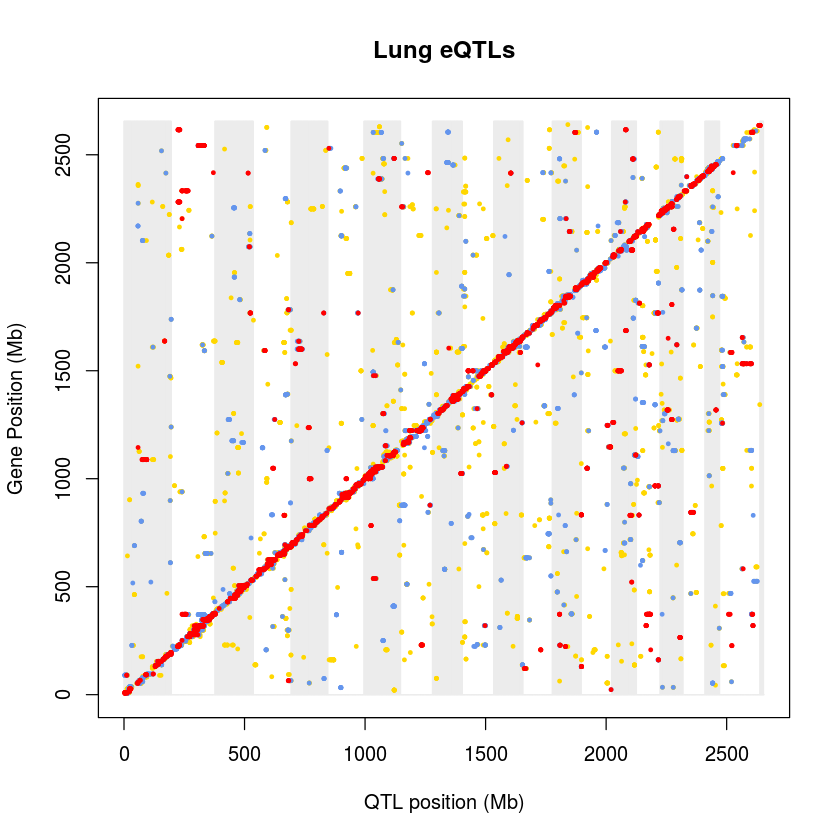

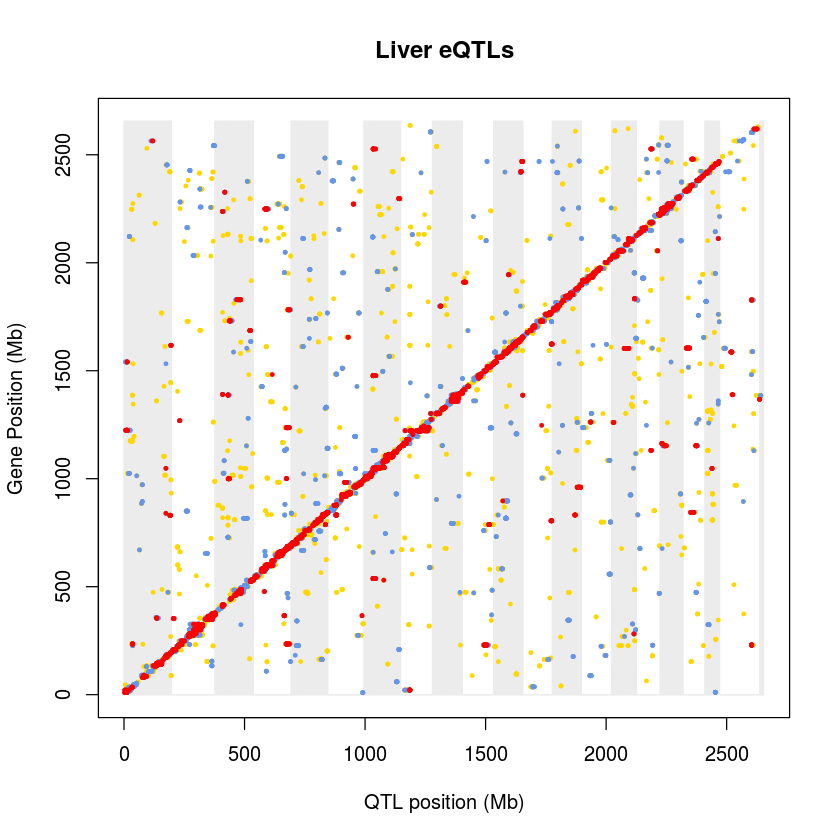

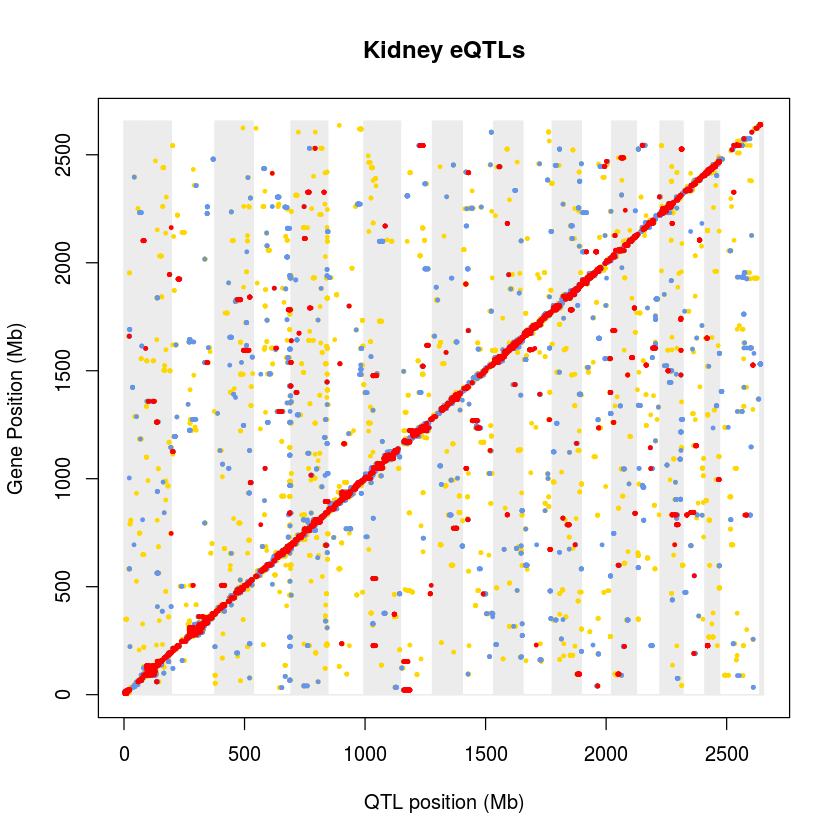

In [5]:
## Lung
# Plot alternate shading to distinguish adjacent chromosomes
chrStrips <- seq(0,0,length=sum(chr.sizes$length))
for(i in 2*0:as.integer((nrow(chr.sizes)-1)/2)+1){
    for (j in (diffinv(chr.sizes$length)[i]:diffinv(chr.sizes$length)[i+1])){
        chrStrips[j] <- 1;
    }
}
plot(chrStrips, type='h', col="#ECECEC", xlab='', ylab='', axes=F, ylim=c(0,1))
par(new=TRUE)

# Plot eqtls
plot(x=lung.x10, y=lung.y10, xlim=c(0,sum(chr.sizes$length)), ylim=c(0,sum(chr.sizes$length)), 
     pch=19, col="gold", xlab="QTL position (Mb)", ylab="Gene Position (Mb)", cex=0.4, main="Lung eQTLs")
points(x=lung.x5, y=lung.y5, pch=19, col="cornflowerblue", cex=0.4)
points(x=lung.x1, y=lung.y1, pch=19, col="red", cex=0.4)

## Liver
# Plot alternate shading to distinguish adjacent chromosomes
chrStrips <- seq(0,0,length=sum(chr.sizes$length))
for(i in 2*0:as.integer((nrow(chr.sizes)-1)/2)+1){
    for (j in (diffinv(chr.sizes$length)[i]:diffinv(chr.sizes$length)[i+1])){
        chrStrips[j] <- 1;
    }
}
plot(chrStrips, type='h', col="#ECECEC", xlab='', ylab='', axes=F, ylim=c(0,1))
par(new=TRUE)

# Plot eqtls
plot(x=liver.x10, y=liver.y10, xlim=c(0,sum(chr.sizes$length)), ylim=c(0,sum(chr.sizes$length)), 
     pch=19, col="gold", xlab="QTL position (Mb)", ylab="Gene Position (Mb)", cex=0.4, main="Liver eQTLs")
points(x=liver.x5, y=liver.y5, pch=19, col="cornflowerblue", cex=0.4)
points(x=liver.x1, y=liver.y1, pch=19, col="red", cex=0.4)


## Kidney
# Plot alternate shading to distinguish adjacent chromosomes
chrStrips <- seq(0,0,length=sum(chr.sizes$length))
for(i in 2*0:as.integer((nrow(chr.sizes)-1)/2)+1){
    for (j in (diffinv(chr.sizes$length)[i]:diffinv(chr.sizes$length)[i+1])){
        chrStrips[j] <- 1;
    }
}
plot(chrStrips, type='h', col="#ECECEC", xlab='', ylab='', axes=F, ylim=c(0,1))
par(new=TRUE)

# Plot eqtls
plot(x=kidney.x10, y=kidney.y10, xlim=c(0,sum(chr.sizes$length)), ylim=c(0,sum(chr.sizes$length)), 
     pch=19, col="gold", xlab="QTL position (Mb)", ylab="Gene Position (Mb)", cex=0.4, main="Kidney eQTLs")
points(x=kidney.x5, y=kidney.y5, pch=19, col="cornflowerblue", cex=0.4)
points(x=kidney.x1, y=kidney.y1, pch=19, col="red", cex=0.4)
